In [33]:
from bmtk.builder.networks import NetworkBuilder

net = NetworkBuilder('cortex')
net.add_nodes(
    cell_name='626170421',
    potential='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='fit_parameters.json',
    morphology='reconstruction.swc'
)


In [34]:
net.build()
net.save_nodes(output_dir='my_sim/network')

In [35]:
for node in net.nodes():
    print(node)

{'cell_name': '626170421', 'potential': 'exc', 'model_type': 'biophysical', 'model_template': 'ctdb:Biophys1.hoc', 'model_processing': 'aibs_perisomatic', 'dynamics_params': 'fit_parameters.json', 'morphology': 'reconstruction.swc', 'node_type_id': 100, 'node_id': 0}


In [36]:
from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(
    base_dir='my_sim',       # Where to save the scripts and config files 
    config_file='config.json', # Where main config will be saved.
    network_dir='network',     # Location of directory containing network files
    tstop=2000.0, dt=0.1,      # Run a simulation for 2000 ms at 0.1 ms intervals
    report_vars=['v', 'cai'],  # Tells simulator we want to record membrane potential and calcium traces
    current_clamp={            # Creates a step current from 500.0 ms to 1500.0 ms  
        'amp': 0.09,
        'delay': 500.0,
        'duration': 1000.0
    },
    compile_mechanisms=True   # Will try to compile NEURON mechanisms
)

/opt/miniconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/usr/bin/xcrun
/Users/ninazhang/Desktop/NZ/my_sim/components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/SK.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [37]:
from bmtk.simulator import bionet
from neuron import h

# Initialize ParallelContext
pc = h.ParallelContext()

# Clear any existing gid assignments
if pc.gid_exists(0):  # Check if gid 0 already exists
    pc.gid_clear(0)   # Clear gid 0 if it is assigned

# Load and build the configuration
conf = bionet.Config.from_json('my_sim/config.json')
conf.build_env()

# Build the BioNetwork and BioSimulator
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)

# Run the simulation
sim.run()

# Reset the ParallelContext after the simulation (optional, for subsequent runs)
pc.done()

2024-10-06 16:21:31,117 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


Mechanisms already loaded from path: /Users/ninazhang/Desktop/NZ/my_sim/components/mechanisms.  Aborting.
2024-10-06 16:21:31,137 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2024-10-06 16:21:31,320 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2024-10-06 16:21:31,330 [INFO] Running simulation for 2000.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 2000.000 ms with the time step 0.100 ms


2024-10-06 16:21:31,331 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2024-10-06 16:21:31,333 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2024-10-06 16:21:31,622 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2024-10-06 16:21:31,834 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2024-10-06 16:21:32,039 [INFO]     step:15000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:1500.00 ms


2024-10-06 16:21:32,245 [INFO]     step:20000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:2000.00 ms


2024-10-06 16:21:32,262 [INFO] Simulation completed in 0.9319 seconds 


INFO:NEURONIOUtils:Simulation completed in 0.9319 seconds 


0.0

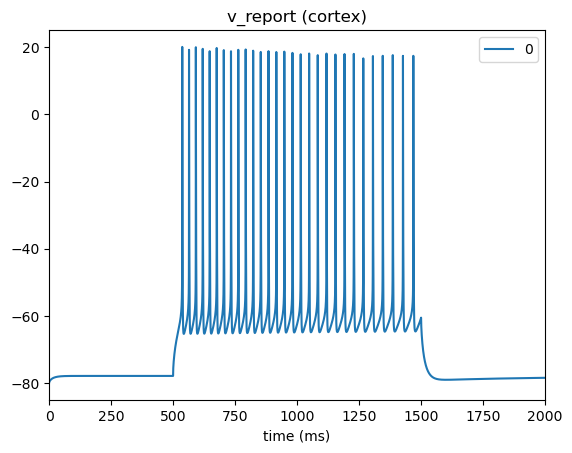

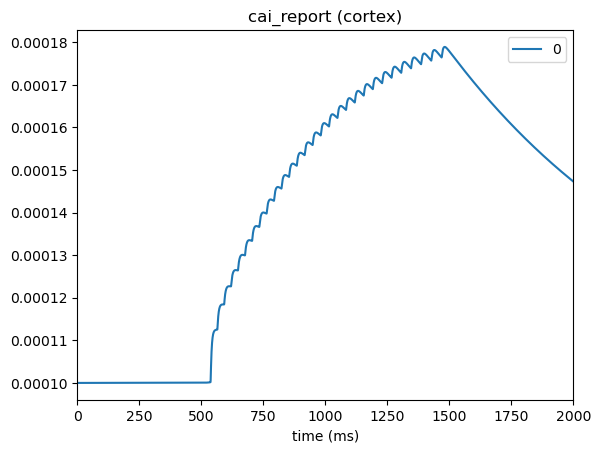

In [38]:
from bmtk.analyzer.compartment import plot_traces

_ = plot_traces(config_file='my_sim/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='my_sim/config.json', node_ids=[0], report_name='cai_report')